<a href="https://colab.research.google.com/github/andysingal/nlp/blob/main/sentimental_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#!ssh-keygen -t rsa -b 4096


In [27]:
#!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [28]:
#!cat /root/.ssh/id_rsa.pub

In [29]:
#!pip install git+ssh://git@github.com/andysingal/preprocess_andy.git

In [30]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [31]:
#!pip install h2o==3.30.0.1

In [32]:
import tensorflow_datasets as tfds
import h2o
import numpy as np
import preprocess_andy as ps

In [33]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,14 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,"1 year, 2 months and 3 days !!!"
H2O_cluster_name:,H2O_from_python_unknownUser_tn8xgr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.143 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [34]:
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)
train_dataset = dataset['train']

In [35]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [36]:
dataset=tfds.as_numpy(train_dataset)

In [37]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [38]:
helpful_votes=dataset['data']['helpful_votes']
review_headline=dataset['data']['review_headline']
review_body=dataset['data']['review_body']
rating=dataset['data']['star_rating']

In [39]:
h2o_df=h2o.H2OFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),column_names=['votes','headline','reviews','rating'],column_types=['numeric','string','string','numeric'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
h2o_df

votes,headline,reviews,rating
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4
0,b'Five Stars',b'Top quality.',5
1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3
6,b'Seems to work well!',"b'I recently picked this unit up at Bed and Bath where it was $99.00. With a 20% coupon the price was $80 (so comparison shop!) It\'s easy to use and seems to work well. I agree with other reviewers about the noise level (loud like a tea kettle boiling), but I use this unit in the living room area so sleeping is not an issue. Having the 2 separate water reservoirs to fill is much easier, weight-wise, as I previously had another humidifier which had one large water reservoir and it was very heavy when full. The unit comes apart quite easily for cleaning and since frequent cleaning is recommended (I usually do it 1x per week, not daily) this is a definite plus. Additionally, one only needs to use vinegar to clean the inside reservoir, which is a lot cheaper than having to buy some kind of \\\\""special\\\\"" cleaning solution. My one complaint is that it doesn\'t, but should, have an automatic shut off when both tanks are empty.I have to remember to turn the unit off when I leave the house. My previous humidifiers all had this auto turn off; seems like every humidifier should.'",4
8,b'deep heat?????',"b'Not sure what previous reviewer was talking about. The product uses ULTRASOUND waves for pain relief NOT heat. After repeated use, the pain in my knee and shoulder was feeling great. I think you should re-read the description and reconsider your opinion. Great product sold by a great company.'",5
2,b'Thermometer for a toddler',"b""The shippers were great....willing to consider speedier shipping options, but in the end the standard shipping arrived quickly enough. The 

In [41]:
h2o_df["target"] = (h2o_df["rating"] >= 4).ifelse("1", "0")

In [42]:
h2o_df

votes,headline,reviews,rating,target
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5,1
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4,1
0,b'Five Stars',b'Top quality.',5,1
1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3,0
6,b'Seems to work well!',"b'I recently picked this unit up at Bed and Bath where it was $99.00. With a 20% coupon the price was $80 (so comparison shop!) It\'s easy to use and seems to work well. I agree with other reviewers about the noise level (loud like a tea kettle boiling), but I use this unit in the living room area so sleeping is not an issue. Having the 2 separate water reservoirs to fill is much easier, weight-wise, as I previously had another humidifier which had one large water reservoir and it was very heavy when full. The unit comes apart quite easily for cleaning and since frequent cleaning is recommended (I usually do it 1x per week, not daily) this is a definite plus. Additionally, one only needs to use vinegar to clean the inside reservoir, which is a lot cheaper than having to buy some kind of \\\\""special\\\\"" cleaning solution. My one complaint is that it doesn\'t, but should, have an automatic shut off when both tanks are empty.I have to remember to turn the unit off when I leave the house. My previous humidifiers all had this auto turn off; seems like every humidifier should.'",4,1
8,b'deep heat?????',"b'Not sure what previous reviewer was talking about. The product uses ULTRASOUND waves for pain relief NOT heat. After repeated use, the pain in my knee and shoulder was feeling great. I think you should re-read the description and reconsider your opinion. Great product sold by a great company.'",5,1
2,b'Thermometer for a toddler',"b""The shippers were great....willing to consider speedier shipping options, but in the end the standard shipping arrived

In [43]:
h2o_df["target"].table()

target,Count
0,23427
1,62554


In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
def tokenize(line):
  tokenized = line.tokenize("\\W+")
  tokenized = tokenized.tolower()
  tokenized = tokenized[(tokenized.nchar() >= 2) | (tokenized.isna()),:]
  tokenized_filter = tokenized[(tokenized.isna()) | (~ tokenized.isin(stop_words)),:]
  return tokenized_filter

In [46]:
words_reviews = tokenize(h2o_df["reviews"])

In [47]:
words_headline = tokenize(h2o_df["headline"])

In [48]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OGradientBoostingEstimator, H2OXGBoostEstimator

In [49]:
vec_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v_amazon.model")
vec_model.train(training_frame=words_reviews)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [50]:
h2o.save_model(vec_model,path='./')

'/content/w2v_amazon.model'

In [51]:
vec_model=h2o.load_model("w2v_amazon.model")

In [52]:
vec_model.find_synonyms("perfumes", count = 5)

OrderedDict([('scents', 0.6910654902458191),
             ('patchouli', 0.6740429997444153),
             ('febreze', 0.6660743951797485),
             ('ammonia', 0.6595839262008667),
             ('fragrances', 0.6517752408981323)])

In [53]:
vec_model.find_synonyms("toothpaste", count = 5)

OrderedDict([('listerine', 0.7461931109428406),
             ('mouthwash', 0.7318481802940369),
             ('plax', 0.7108482718467712),
             ('ultreo', 0.6934536099433899),
             ('whitening', 0.6929551362991333)])

In [54]:
vec_model.find_synonyms("glasses", count = 5)

OrderedDict([('sunglasses', 0.8971438407897949),
             ('readers', 0.8649334907531738),
             ('lenses', 0.8119096159934998),
             ('bifocal', 0.7958155870437622),
             ('bifocals', 0.7945257425308228)])

In [55]:

review_vecs = vec_model.transform(words_reviews, aggregate_method = "AVERAGE")

In [56]:
h2o_df_ext=h2o_df.cbind(review_vecs)

In [57]:
h2o_train,h2o_valid = h2o_df_ext.split_frame(ratios=[.8])

In [58]:
h2o_valid['target'].table()

target,Count
0,4635
1,12562


In [59]:
gbm_baseline = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10                                             
                                             )

In [60]:
gbm_baseline.train(x=review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [61]:
print("Baseline AUC: " + str(round(gbm_baseline.auc(valid = True), 3)))

Baseline AUC: 0.875


In [62]:
gbm_baseline.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49048697809237446: 


,,0,1,Error,Rate
0,0,2345.0,2290.0,0.4941,(2290.0/4635.0)
1,1,655.0,11907.0,0.0521,(655.0/12562.0)
2,Total,3000.0,14197.0,0.1713,(2945.0/17197.0)


In [63]:
gbm_balanced = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              balance_classes= True
                                             )

In [64]:
gbm_balanced.train(x=review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [65]:
print(" Balanced AUC: " + str(round(gbm_balanced.auc(valid = True), 3)))

 Balanced AUC: 0.875


In [66]:
gbm_balanced.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5261134451426308: 


,,0,1,Error,Rate
0,0,2433.0,2202.0,0.4751,(2202.0/4635.0)
1,1,739.0,11823.0,0.0588,(739.0/12562.0)
2,Total,3172.0,14025.0,0.171,(2941.0/17197.0)


In [67]:
headline_vecs = vec_model.transform(words_headline, aggregate_method = "AVERAGE")
headline_vecs.names = ["headline_" + s for s in headline_vecs.names]

In [68]:
h2o_df_ext = h2o_df_ext.cbind(headline_vecs)

In [69]:
h2o_train,h2o_valid = h2o_df_ext.split_frame(ratios=[.8])

In [70]:
gbm_all_cols = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10
                                             )

In [71]:
gbm_all_cols.train(x=['votes']+headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
print(" All Columns AUC: " + str(round(gbm_all_cols.auc(valid = True), 3)))

 All Columns AUC: 0.92


In [73]:
gbm_all_cols.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5218267119076496: 


,,0,1,Error,Rate
0,0,3004.0,1710.0,0.3627,(1710.0/4714.0)
1,1,624.0,11849.0,0.05,(624.0/12473.0)
2,Total,3628.0,13559.0,0.1358,(2334.0/17187.0)


In [74]:
gbm_all_cols.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-06-07 13:42:43,0.007 sec,0.0,0.444998,0.585253,0.500000,0.727985,1.000000,0.272015,0.446155,0.587480,0.500000,0.725723,1.000000,0.274277
1,,2021-06-07 13:42:52,9.157 sec,10.0,0.361479,0.421776,0.889547,0.952308,1.372606,0.156060,0.367466,0.431672,0.878522,0.947458,1.377936,0.167219
2,,2021-06-07 13:43:00,17.187 sec,20.0,0.332493,0.364699,0.908835,0.961293,1.373655,0.142265,0.341385,0.378995,0.896858,0.955884,1.377936,0.154477
3,,2021-06-07 13:43:08,25.213 sec,30.0,0.316810,0.333184,0.921243,0.966854,1.373655,0.131465,0.328221,0.351323,0.908071,0.961001,1.377936,0.145051
4,,2021-06-07 13:43:16,33.083 sec,40.0,0.305940,0.311586,0.930059,0.970835,1.373655,0.124095,0.319697,0.333289,0.915432,0.964381,1.377936,0.139640
5,,2021-06-07 13:43:24,41.111 sec,50.0,0.297837,0.295899,0.936353,0.973619,1.373655,0.118353,0.313856,0.321013,0.920244,0.966469,1.377936,0.135800


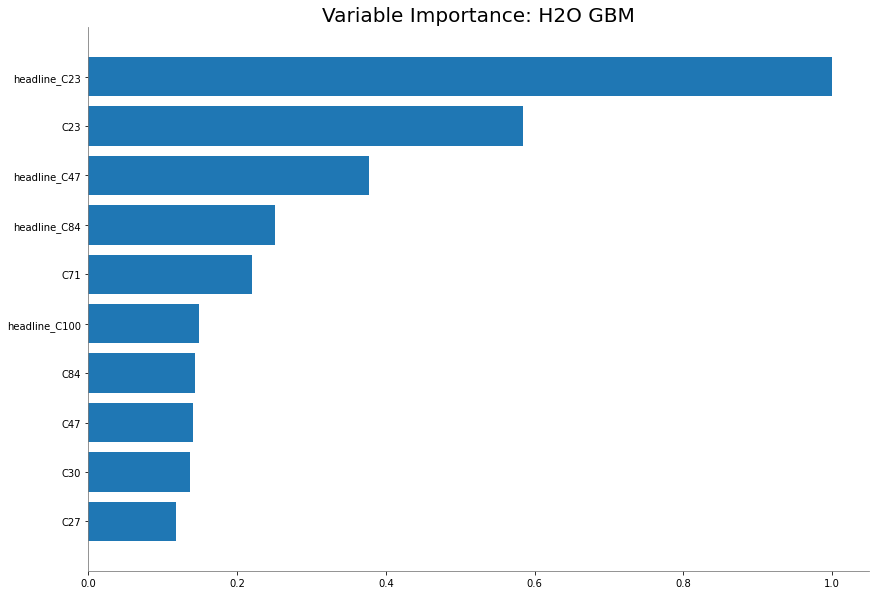

In [75]:
gbm_all_cols.varimp_plot()

In [76]:
xgb_all_feat = H2OXGBoostEstimator(ntrees = 100,learn_rate = 0.1, max_leaves = 6, tree_method="hist",  grow_policy="lossguide")

In [77]:
xgb_all_feat.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [78]:
print(" XGBoost AUC: " + str(round(xgb_all_feat.auc(valid = True), 3)))

 XGBoost AUC: 0.918


In [79]:

xgb_all_feat.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.480442221959432: 


,,0,1,Error,Rate
0,0,2798.0,1916.0,0.4064,(1916.0/4714.0)
1,1,496.0,11977.0,0.0398,(496.0/12473.0)
2,Total,3294.0,13893.0,0.1403,(2412.0/17187.0)


In [80]:
h2o_train, h2o_valid, h2o_test = h2o_df_ext.split_frame(ratios=[.7,.15])

In [81]:
gbm_final = H2OGradientBoostingEstimator(ntrees=200,
                                              max_depth = 6,  learn_rate=0.1
                                             )

In [82]:
gbm_final.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [83]:
gbm_final.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5372764765985267: 


,,0,1,Error,Rate
0,0,2617.0,902.0,0.2563,(902.0/3519.0)
1,1,525.0,8810.0,0.0562,(525.0/9335.0)
2,Total,3142.0,9712.0,0.111,(1427.0/12854.0)


In [84]:
gbm_final.model_performance(h2o_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08534222618638963
RMSE: 0.29213391824023044
LogLoss: 0.27755858442568454
Mean Per-Class Error: 0.14061539024999348
AUC: 0.9366290089890932
AUCPR: 0.9733229457993225
Gini: 0.8732580179781864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42987065154686377: 


,,0,1,Error,Rate
0,0,2383.0,1164.0,0.3282,(1164.0/3547.0)
1,1,389.0,9033.0,0.0413,(389.0/9422.0)
2,Total,2772.0,10197.0,0.1197,(1553.0/12969.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.429871,0.920842,246.0
1,max f2,0.171079,0.953676,327.0
2,max f0point5,0.773170,0.924341,140.0
3,max accuracy,0.567135,0.881255,207.0
4,max precision,0.998347,1.000000,0.0
5,max recall,0.003943,1.000000,398.0
6,max specificity,0.998347,1.000000,0.0
7,max absolute_mcc,0.567135,0.695293,207.0
8,max min_per_class_accuracy,0.763632,0.857344,144.0
9,max mean_per_class_accuracy,0.773170,0.859385,140.0



Gains/Lift Table: Avg response rate: 72.65 %, avg score: 73.37 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010024,0.998288,1.376459,1.376459,1.000000,0.998504,1.000000,0.998504,0.013797,0.013797,37.645935,37.645935
1,,2,0.020973,0.997876,1.376459,1.376459,1.000000,0.998073,1.000000,0.998279,0.015071,0.028869,37.645935,37.645935
2,,3,0.030072,0.997539,1.376459,1.376459,1.000000,0.997686,1.000000,0.998100,0.012524,0.041392,37.645935,37.645935
3,,4,0.040019,0.997208,1.376459,1.376459,1.000000,0.997400,1.000000,0.997926,0.013691,0.055084,37.645935,37.645935
4,,5,0.050042,0.996878,1.365871,1.374338,0.992308,0.997088,0.998459,0.997758,0.013691,0.068775,36.587120,37.433846
5,,6,0.100008,0.994493,1.370087,1.372214,0.995370,0.995786,0.996916,0.996773,0.068457,0.137232,37.008685,37.221429
6,,7,0.150050,0.991649,1.374338,1.372923,0.998459,0.993138,0.997431,0.995560,0.068775,0.206007,37.433846,37.292271
7,,8,0.200015,0.987602,1.363714,1.370622,0.990741,0.989687,0.995759,0.994093,0.068138,0.274146,36.371436,37.062240
8,,9,0.300023,0.976439,1.358418,1.366554,0.986893,0.982426,0.992804,0.990204,0.135852,0.409998,35.841786,36.655422
9,,10,0.400031,0.956604,1.332948,1.358153,0.968389,0.967669,0.986700,0.984571,0.133305,0.543303,33.294753,35.815255


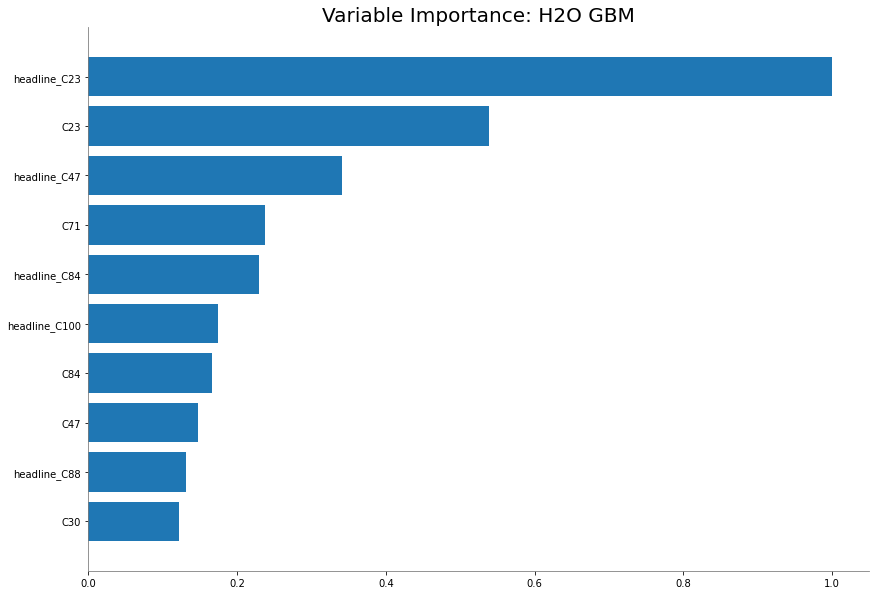

In [85]:
gbm_final.varimp_plot()

HYPERPARAMETERS

In [86]:
ntrees_opt = [100, 200, 250, 300]
max_depth_opt = [6, 7, 8]
learn_rate_opt = [0.01, 0.1]

In [90]:
hyper_parameters = {"ntrees": ntrees_opt,"max_depth":max_depth_opt, "learn_rate":learn_rate_opt}
search_criteria = {"strategy":"RandomDiscrete","max_models":4}

In [89]:
from h2o.grid.grid_search import H2OGridSearch
gs = H2OGridSearch(H2OGradientBoostingEstimator,hyper_params=hyper_parameters, search_criteria=search_criteria)

In [93]:
gs.train(x=headline_vecs.names+review_vecs.names, y='target', training_frame = h2o_train, validation_frame=h2o_valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [94]:
print(gs.get_grid(sort_by='auc', decreasing=True))

     ...                 auc
0    ...  0.9417413130921543
1    ...  0.9409767894023309
2    ...  0.9402665429523075
3    ...  0.9366479892687535
4    ...  0.9357383660480796
5    ...  0.9275591695734519
6    ...  0.9166773592524657
7    ...  0.9120473402249902

[8 rows x 6 columns]



In [95]:
gs.models[0]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_388_sid_9f2d_model_python_1623067119185_145_model_6


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,234043.0,6.0,6.0,6.0,33.0,64.0,57.41




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.028955523746851355
RMSE: 0.17016322677609094
LogLoss: 0.11895406777755614
Mean Per-Class Error: 0.0331472771838337
AUC: 0.9947596882855964
AUCPR: 0.9979006998083453
Gini: 0.9895193765711927

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5680239065216407: 


,,0,1,Error,Rate
0,0,15403.0,958.0,0.0586,(958.0/16361.0)
1,1,712.0,43085.0,0.0163,(712.0/43797.0)
2,Total,16115.0,44043.0,0.0278,(1670.0/60158.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.568024,0.980988,202.0
1,max f2,0.441436,0.986817,235.0
2,max f0point5,0.698675,0.983469,165.0
3,max accuracy,0.568024,0.972240,202.0
4,max precision,0.999103,1.000000,0.0
5,max recall,0.022976,1.000000,381.0
6,max specificity,0.999103,1.000000,0.0
7,max absolute_mcc,0.568024,0.929617,202.0
8,max min_per_class_accuracy,0.672060,0.966322,173.0
9,max mean_per_class_accuracy,0.656140,0.966853,177.0



Gains/Lift Table: Avg response rate: 72.80 %, avg score: 72.80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010007,0.999102,1.373564,1.373564,1.000000,0.999229,1.000000,0.999229,0.013745,0.013745,37.356440,37.356440
1,,2,0.020031,0.998827,1.373564,1.373564,1.000000,0.998972,1.000000,0.999101,0.013768,0.027513,37.356440,37.356440
2,,3,0.030004,0.998611,1.373564,1.373564,1.000000,0.998715,1.000000,0.998972,0.013700,0.041213,37.356440,37.356440
3,,4,0.040011,0.998402,1.373564,1.373564,1.000000,0.998515,1.000000,0.998858,0.013745,0.054958,37.356440,37.356440
4,,5,0.050002,0.998230,1.373564,1.373564,1.000000,0.998320,1.000000,0.998751,0.013722,0.068681,37.356440,37.356440
5,,6,0.100003,0.996807,1.373564,1.373564,1.000000,0.997582,1.000000,0.998166,0.068681,0.137361,37.356440,37.356440
6,,7,0.150005,0.994805,1.373564,1.373564,1.000000,0.995833,1.000000,0.997388,0.068681,0.206042,37.356440,37.356440
7,,8,0.200007,0.992013,1.373108,1.373450,0.999668,0.993479,0.999917,0.996411,0.068658,0.274699,37.310776,37.345024
8,,9,0.300010,0.983502,1.372879,1.373260,0.999501,0.988114,0.999778,0.993645,0.137293,0.411992,37.287944,37.325997
9,,10,0.399997,0.969368,1.371738,1.372879,0.998670,0.977047,0.999501,0.989496,0.137156,0.549147,37.173755,37.287942




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.08138071472692243
RMSE: 0.28527305292810684
LogLoss: 0.2670590983991394
Mean Per-Class Error: 0.1354547575766294
AUC: 0.9409767894023309
AUCPR: 0.9752695306405367
Gini: 0.8819535788046617

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47734388387559007: 


,,0,1,Error,Rate
0,0,2511.0,1008.0,0.2864,(1008.0/3519.0)
1,1,408.0,8927.0,0.0437,(408.0/9335.0)
2,Total,2919.0,9935.0,0.1102,(1416.0/12854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.477344,0.926518,241.0
1,max f2,0.229370,0.954519,311.0
2,max f0point5,0.806144,0.927445,127.0
3,max accuracy,0.528152,0.890773,225.0
4,max precision,0.999148,1.000000,0.0
5,max recall,0.011074,1.000000,391.0
6,max specificity,0.999148,1.000000,0.0
7,max absolute_mcc,0.576961,0.720096,209.0
8,max min_per_class_accuracy,0.765344,0.862346,143.0
9,max mean_per_class_accuracy,0.748547,0.864545,150.0



Gains/Lift Table: Avg response rate: 72.62 %, avg score: 73.51 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010736,0.999104,1.376968,1.376968,1.000000,0.999249,1.000000,0.999249,0.014783,0.014783,37.696840,37.696840
1,,2,0.020072,0.998840,1.376968,1.376968,1.000000,0.998986,1.000000,0.999126,0.012855,0.027638,37.696840,37.696840
2,,3,0.030030,0.998612,1.376968,1.376968,1.000000,0.998726,1.000000,0.998994,0.013712,0.041350,37.696840,37.696840
3,,4,0.040065,0.998402,1.376968,1.376968,1.000000,0.998518,1.000000,0.998874,0.013819,0.055169,37.696840,37.696840
4,,5,0.050023,0.998210,1.376968,1.376968,1.000000,0.998310,1.000000,0.998762,0.013712,0.068881,37.696840,37.696840
5,,6,0.100047,0.996764,1.374827,1.375898,0.998445,0.997535,0.999222,0.998148,0.068773,0.137654,37.482692,37.589766
6,,7,0.149992,0.994342,1.372679,1.374826,0.996885,0.995633,0.998444,0.997311,0.068559,0.206213,37.267878,37.482581
7,,8,0.200016,0.991353,1.370544,1.373755,0.995334,0.992897,0.997666,0.996207,0.068559,0.274772,37.054397,37.375494
8,,9,0.299984,0.981433,1.359823,1.369112,0.987549,0.987082,0.994295,0.993166,0.135940,0.410712,35.982327,36.911225
9,,10,0.400031,0.964869,1.320219,1.356884,0.958787,0.974064,0.985414,0.988388,0.132084,0.542796,32.021931,35.688426




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-06-07 15:52:09,1 min 23.262 sec,0.0,0.444973,0.585206,0.500000,0.728033,1.000000,0.271967,0.445894,0.586978,0.500000,0.726233,1.000000,0.273767
1,,2021-06-07 15:52:10,1 min 24.402 sec,1.0,0.429235,0.551554,0.855228,0.936638,1.364126,0.181439,0.430261,0.553478,0.853097,0.935552,1.367630,0.191769
2,,2021-06-07 15:52:11,1 min 25.261 sec,2.0,0.415741,0.524563,0.870380,0.943780,1.367649,0.172795,0.417034,0.526996,0.864572,0.941017,1.370685,0.177766
3,,2021-06-07 15:52:12,1 min 26.147 sec,3.0,0.403786,0.501579,0.880902,0.948358,1.369312,0.164517,0.405495,0.504751,0.873903,0.944926,1.372144,0.172553
4,,2021-06-07 15:52:13,1 min 27.069 sec,4.0,0.393539,0.482297,0.887137,0.951264,1.370240,0.159314,0.395900,0.486650,0.877524,0.946461,1.371311,0.170375
5,,2021-06-07 15:52:17,1 min 31.185 sec,9.0,0.357550,0.415520,0.903527,0.958560,1.372005,0.145932,0.362210,0.423493,0.892097,0.953249,1.376968,0.155049
6,,2021-06-07 15:52:21,1 min 35.327 sec,14.0,0.336910,0.376311,0.913852,0.963300,1.373564,0.138535,0.343710,0.387527,0.901024,0.957447,1.376968,0.150770
7,,2021-06-07 15:52:25,1 min 39.455 sec,19.0,0.322906,0.348806,0.922895,0.967492,1.373564,0.131387,0.332163,0.363817,0.908038,0.960611,1.376968,0.142757
8,,2021-06-07 15:52:29,1 min 43.580 sec,24.0,0.312248,0.327913,0.930167,0.970757,1.373564,0.123392,0.324418,0.347375,0.912968,0.962891,1.376968,0.140190
9,,2021-06-07 15:52:33,1 min 47.783 sec,29.0,0.303777,0.311561,0.936010,0.973324,1.371305,0.117557,0.318392,0.334671,0.917371,0.964863,1.376968,0.135444



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,headline_C23,7434.596191,1.000000,0.159119
1,C23,4023.391113,0.541171,0.086111
2,headline_C47,2545.779053,0.342423,0.054486
3,C71,1784.163940,0.239981,0.038186
4,headline_C84,1723.029785,0.231758,0.036877
5,headline_C100,1299.220703,0.174753,0.027807
6,C84,1249.293579,0.168038,0.026738
7,C47,1110.674683,0.149393,0.023771
8,headline_C88,995.713074,0.133930,0.021311
9,C30,910.201660,0.122428,0.019481



See the whole table with table.as_data_frame()
